In [14]:
import os
os.getenv("GROQ_API_KEY")

In [ ]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['GROQ_API_KEY'] = "GROQ_API_KEY"

In [16]:
model="llama3-8b-8192"

In [17]:
from langchain_groq import ChatGroq

In [31]:
pip install langchain_groq

Note: you may need to restart the kernel to use updated packages.


In [18]:
llm=ChatGroq(model_name=model)

In [19]:
llm.invoke("hi")

AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.033866741, 'prompt_time': 0.006874944, 'queue_time': 0.044806516, 'total_time': 0.040741685}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--2e6cda54-8460-4ddc-b00a-39979930e932-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})

In [20]:
llm.invoke("hi").content

"Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?"

In [40]:
pip install langgraph


Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install --upgrade langgraph


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 497.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 905.6 kB/s eta 0:00:000:00:01
  Attempting uninstall: langgraph-checkpoint
    Found existing installation: langgraph-checkpoint 2.0.26
    Uninstalling langgraph-checkpoint-2.0.26:
      Successfully uninstalled langgraph-checkpoint-2.0.26
  Attempting uninstall: langgraph-prebuilt
    Found existing installation: langgraph-prebuilt 0.2.2
    Uninstalling langgraph-prebuilt-0.2.2:
      Successfully uninstalled langgraph-prebuilt-0.2.2
  Attempting uninstall: langgraph
    Found existing installation: langgraph 0.4.8
    Uninstalling langgraph-0.4.8:
      Successfully uninstalled langgraph-0.4.8
Note: you may need to restart the kernel to use updated packages.


In [54]:
import operator
from pydantic import BaseModel,Field
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode


In [22]:
from typing import TypedDict
from langchain_core.messages import BaseMessage

class MessageState(TypedDict):
    messages: list[BaseMessage]


In [23]:
pip show langgraph


Name: langgraph
Version: 0.5.2
Summary: Building stateful, multi-actor applications with LLMs
Home-page: 
Author: 
Author-email: 
License: 
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: langchain-core, langgraph-checkpoint, langgraph-prebuilt, langgraph-sdk, pydantic, xxhash
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [24]:
def call_model(state:MessageState):
    message=state["messages"]
    response=llm.invoke(message)
    return {"messages":[response]}

In [25]:
state={"messages":["hi hello how are you?"]}

In [26]:
call_model(state)

{'messages': [AIMessage(content="Hello! I'm just an AI, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to help with any questions or tasks you have! How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 16, 'total_tokens': 61, 'completion_time': 0.060835048, 'prompt_time': 0.008104388, 'queue_time': 1.153142292, 'total_time': 0.068939436}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--bddb5cfc-d029-4a28-b78f-23d95e60dfa5-0', usage_metadata={'input_tokens': 16, 'output_tokens': 45, 'total_tokens': 61})]}

In [28]:
workflow=StateGraph(MessageState)

In [29]:
workflow.add_node("mybot", call_model)

In [30]:
workflow.add_edge(START, "mybot")

In [31]:
workflow.add_edge("mybot",END)

In [32]:
app=workflow.compile()

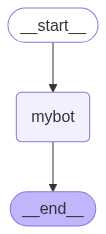

In [34]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
input={"messages":["hi hello how are you?"]}

In [36]:
app.invoke(input)

{'messages': [AIMessage(content="Hi! I'm just an AI, so I don't have feelings like humans do, but I'm functioning properly and ready to help you with any questions or tasks you have! How about you? How's your day going?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 16, 'total_tokens': 63, 'completion_time': 0.05186809, 'prompt_time': 0.003155592, 'queue_time': 0.045028628, 'total_time': 0.055023682}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--37e82161-4171-4881-8e85-4a3157b0384a-0', usage_metadata={'input_tokens': 16, 'output_tokens': 47, 'total_tokens': 63})]}

In [38]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="Hi! I'm just an AI, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to help you with any questions or tasks you may have! It's great to chat with you! How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 16, 'total_tokens': 71, 'completion_time': 0.061720599, 'prompt_time': 0.004274162, 'queue_time': 0.044844788000000003, 'total_time': 0.065994761}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--1c03e8d9-be48-4ef9-b03c-e566b87c946f-0', usage_metadata={'input_tokens': 16, 'output_tokens': 55, 'total_tokens': 71})]}




In [40]:
from langchain_core.tools import tool


In [41]:
@tool
def search(query:str):
    """this is my custom took for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"

In [42]:
search.invoke("what is the weather in kashmir?")

'the temp is 25 degree and cloudy'

In [43]:
tools=[search]

In [44]:
llm_with_tool=llm.bind_tools(tools)

In [45]:
response=llm_with_tool.invoke("what is the weather in kashmir?")

In [46]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '5km3919th', 'function': {'arguments': '{"query":"weather in kashmir"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 887, 'total_tokens': 956, 'completion_time': 0.091763807, 'prompt_time': 0.287522669, 'queue_time': 0.530928717, 'total_time': 0.379286476}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b626c980-2cd1-4b92-abdd-44fa68a9856f-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in kashmir'}, 'id': '5km3919th', 'type': 'tool_call'}], usage_metadata={'input_tokens': 887, 'output_tokens': 69, 'total_tokens': 956})

In [47]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in kashmir'},
  'id': '5km3919th',
  'type': 'tool_call'}]

In [48]:
def call_model(state:MessageState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [49]:
input={"messages":["what is the weather in kashmir?"]}

In [50]:
call_model(input)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'jgsdrnmrt', 'function': {'arguments': '{"query":"weather in kashmir"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 887, 'total_tokens': 956, 'completion_time': 0.076895, 'prompt_time': 0.270310682, 'queue_time': 0.14518516599999998, 'total_time': 0.347205682}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--667c4b66-4f4d-44af-9cf1-00073d119155-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in kashmir'}, 'id': 'jgsdrnmrt', 'type': 'tool_call'}], usage_metadata={'input_tokens': 887, 'output_tokens': 69, 'total_tokens': 956})]}

In [65]:
def router_function(state:MessageState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END
    

In [66]:
tools

[StructuredTool(name='search', description='this is my custom took for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x1224f5300>)]

In [67]:
tool_node=ToolNode(tools)

In [68]:
workflow2=StateGraph(MessageState)

In [69]:
workflow2.add_node("llmwithtool", call_model)
workflow2.add_node("tools",tool_node)

In [70]:
workflow2.add_edge(START,"llmwithtool")
workflow2.add_conditional_edges("llmwithtool",router_function,{"tools":"tools",END:END})

In [71]:
app2=workflow2.compile()

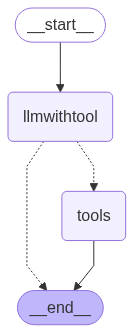

In [72]:
from IPython.display import Image,display
display(Image(app2.get_graph().draw_mermaid_png()))

In [73]:
app2.invoke({"messages":["what is the weather in bengaluru?"]})

{'messages': [ToolMessage(content='the temp is 25 degree and cloudy', name='search', tool_call_id='vvd5zv2y5')]}